In [97]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  #tensorflow is used to to reduce loss function

In [98]:
x_train=np.linspace(0,1,100)
y_train=x_train+np.random.normal(0,1,100)

In [99]:
x_train

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [100]:
y_train

array([-6.67413094e-01, -4.98859583e-01,  1.98579825e-01, -1.84957921e-01,
        8.60190838e-01, -2.07818100e-01,  3.22888632e-01,  8.93488678e-01,
        2.52343146e-02,  2.77045185e-02, -1.04062163e+00, -2.01912045e-01,
       -2.16034428e-01, -2.05705430e-01, -4.94791329e-01,  6.84947590e-01,
        7.32791724e-01, -1.34171645e+00,  9.13324093e-01, -4.01394647e-01,
       -7.06264768e-02,  1.23985392e+00,  2.23885561e-01,  5.40274638e-01,
        1.61477412e+00,  1.69924847e-01,  4.17623687e-01,  1.05575070e+00,
        1.14397709e+00,  4.07778732e-01,  7.68159500e-01,  6.61668069e-01,
       -8.32991802e-01,  4.68686489e-01, -7.80272527e-01,  5.59084624e-01,
        5.22355801e-01, -5.92162526e-01, -5.41518539e-01,  4.81964124e-01,
       -4.65999025e-01,  1.46322021e-01, -1.56650059e+00,  1.34965288e+00,
        1.13314629e+00,  2.51691413e+00,  2.87021102e+00, -5.95106048e-01,
        5.46726171e-01, -2.46802439e+00,  1.03269602e+00,  1.09015023e+00,
        1.57660356e+00,  

In [101]:
learning_rate=0.01 #ranges from 0.01 to 1
training_epochs=100 #number of loops for training through all your data to update parameters

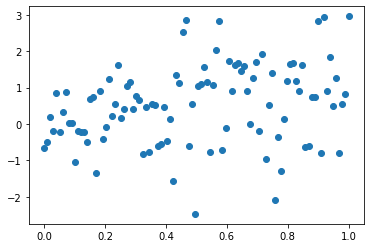

In [102]:
plt.scatter(x_train,y_train)

In [103]:
weight=tf.Variable(0.)

In [104]:
bias=tf.Variable(0.)

In [105]:
#create linear regression expression

In [106]:
#defining linear regression expression
def linreg(x):
    y=weight*x+bias
    return y               #call this function while training

In [107]:
#defining loss function
#here loss function is Measn Squared Error
def squared_error(y_pred,y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

In [108]:
#we will use gradient tape to keep track of loss,compute loss within gradient tape context

In [109]:
#train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted=linreg(x_train)
        loss=squared_error(y_predicted,y_train)
        #get gradient ,optimisation is done using gradient descent
        gradients=tape.gradient(loss,[weight,bias])
        #adjust weights
        weight.assign_sub(gradients[0]*learning_rate) #weight=weight-learning rate*partial derivative
        bias.assign_sub(gradients[1]*learning_rate)   #bias=bias-learning rate*partial_derivative
        print(f"Epoch count {epoch}: Loss value:{loss.numpy()}")

Epoch count 0: Loss value:1.4650483131408691
Epoch count 1: Loss value:1.4490526914596558
Epoch count 2: Loss value:1.4338507652282715
Epoch count 3: Loss value:1.4194027185440063
Epoch count 4: Loss value:1.4056708812713623
Epoch count 5: Loss value:1.3926196098327637
Epoch count 6: Loss value:1.3802145719528198
Epoch count 7: Loss value:1.3684238195419312
Epoch count 8: Loss value:1.357216238975525
Epoch count 9: Loss value:1.3465625047683716
Epoch count 10: Loss value:1.3364354372024536
Epoch count 11: Loss value:1.326808214187622
Epoch count 12: Loss value:1.3176560401916504
Epoch count 13: Loss value:1.308955192565918
Epoch count 14: Loss value:1.3006830215454102
Epoch count 15: Loss value:1.2928178310394287
Epoch count 16: Loss value:1.2853397130966187
Epoch count 17: Loss value:1.2782288789749146
Epoch count 18: Loss value:1.2714674472808838
Epoch count 19: Loss value:1.2650375366210938
Epoch count 20: Loss value:1.2589226961135864
Epoch count 21: Loss value:1.2531070709228516
E

In [110]:
print(weight.numpy())

0.32011303


In [111]:
print(bias.numpy())

0.35172966


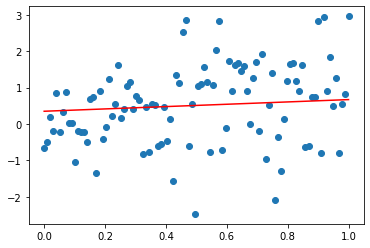

In [112]:
plt.scatter(x_train,y_train)
plt.plot(x_train,linreg(x_train),color="r")